# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`This is how we write code`

## Let's make some data to work on

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


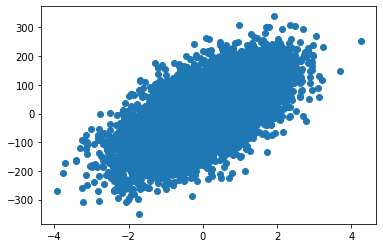

In [2]:
from sklearn.datasets import make_regression

# Regression Dataset
n = 10000
X, y = make_regression(n_samples=n, n_features=1, noise=70)
X = X.reshape(n)
datadict = {'data': X, 'target': y}
data = pd.DataFrame(data=datadict)
plt.scatter(X,y)
plt.show()

In [3]:
X = data.iloc[:,[0]].values
type(X)

numpy.ndarray

In [0]:
y = data.target.values

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler 
scaleObj = StandardScaler()
X_train = scaleObj.fit_transform(X_train)
X_test = scaleObj.transform(X_test)


In [8]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1)
])


model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.99),
    loss = 'mse',
    metrics = ['mse']
)

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 5606.2559 - mse: 5606.2559 - val_loss: 4829.6831 - val_mse: 4829.6831
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 5039.5249 - mse: 5039.5249 - val_loss: 4842.0654 - val_mse: 4842.0654
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 5003.7100 - mse: 5003.7100 - val_loss: 4860.5254 - val_mse: 4860.5254
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 4988.3599 - mse: 4988.3599 - val_loss: 4839.4199 - val_mse: 4839.4199
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 4983.6836 - mse: 4983.6836 - val_loss: 4858.5532 - val_mse: 4858.5532
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 4978.8320 - mse: 4978.8320 - val_loss: 4835.7817 - val_mse: 4835.7817
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 4979.4067 - mse: 4979.4067 - val_loss: 4830.6060 - val_

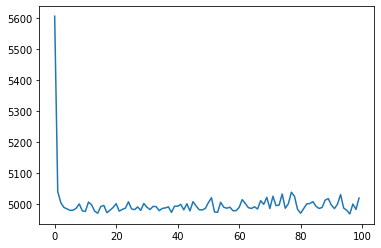

In [9]:
plt.plot(report.history['loss'], label="loss = SGD")

In [20]:
w = model.layers[0].get_weights()[0][0]
print(w)

[59.29902]


In [21]:
print(X.shape)
print(y.shape)
print(w.shape)

(10000, 1)
(10000,)
(1,)


In [25]:
print(type(X))
print(type(w))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


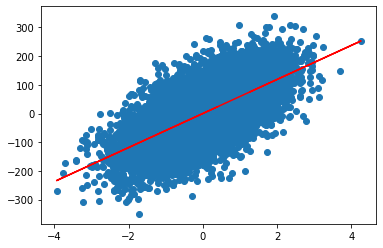

In [28]:
y_predicted = w.dot(X.transpose())
plt.scatter(X,y)
plt.plot(X,y_predicted, 'r', 5)
plt.show()

In [29]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))

250/250 [==============================] - 0s 930us/step - loss: 5025.0532 - mse: 5025.0532
Train eval:  [5025.05322265625, 5025.05322265625]
63/63 [==============================] - 0s 846us/step - loss: 4866.8159 - mse: 4866.8159
Test eval:  [4866.81591796875, 4866.81591796875]
